# Mid-Course Project

Hi There, and thanks for your help. If you're reading this you've been selected to help on a secret initiative.

You will be helping us analyze a portion of data from a company we want to acquire, which could greatly improve the fortunes of Maven Mega Mart.

We'll be working with `project_transactions.csv` and briefly take a look at `product.csv`.

First, read in the transactions data and explore it.

* Take a look at the raw data, the datatypes, and cast `DAY`, `QUANTITY`, `STORE_ID`, and `WEEK_NO` columns to the smallest appropriate datatype. Check the memory reduction by doing so.
* Is there any missing data?
* How many unique households and products are there in the data? The fields household_key and Product_ID will help here.

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/project_transactions.csv").astype({"household_key":"int16","DAY":"int16","PRODUCT_ID":"uint32","QUANTITY":"int32","SALES_VALUE":"float32","STORE_ID":"uint16","RETAIL_DISC":"float32","WEEK_NO":"int8","COUPON_DISC":"float32","COUPON_MATCH_DISC":"float32"})

In [10]:
df.nunique()

,0
household_key,2099
BASKET_ID,232939
DAY,711
PRODUCT_ID,84138
QUANTITY,10593
SALES_VALUE,5327
STORE_ID,526
RETAIL_DISC,2279
WEEK_NO,102
COUPON_DISC,370


## Column Creation

Create two columns:

* A column that captures the `total_discount` by row (sum of `RETAIL_DISC`, `COUPON_DISC`)
* The percentage disount (`total_discount` / `SALES_VALUE`). Make sure this is positive (try `.abs()`).
* If the percentage discount is greater than 1, set it equal to 1. If it is less than 0, set it to 0.
* Drop the individual discount columns (`RETAIL_DISC`, `COUPON_DISC`, `COUPON_MATCH_DISC`).

Feel free to overwrite the existing transaction DataFrame after making the modifications above.

In [33]:
df_new = df.assign(
total_discount = df.RETAIL_DISC + df.COUPON_DISC,
discount_pct = ((df.RETAIL_DISC + df.COUPON_DISC) / df.SALES_VALUE).abs().clip(0,1)
)
df_new = df_new.drop(columns=["RETAIL_DISC","COUPON_DISC","COUPON_MATCH_DISC"])

In [65]:
dfs = df_new
dfs

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,WEEK_NO,total_discount,discount_pct
0,1364,26984896261,1,842930,1,2.19,31742,1,0.00,0.000000
1,1364,26984896261,1,897044,1,2.99,31742,1,-0.40,0.133779
2,1364,26984896261,1,920955,1,3.09,31742,1,0.00,0.000000
3,1364,26984896261,1,937406,1,2.50,31742,1,-0.99,0.396000
4,1364,26984896261,1,981760,1,0.60,31742,1,-0.79,1.000000
...,...,...,...,...,...,...,...,...,...,...
2146306,1598,42305362535,711,92130,1,0.99,3228,102,0.00,0.000000
2146307,1598,42305362535,711,114102,1,8.89,3228,102,0.00,0.000000
2146308,1598,42305362535,711,133449,1,6.99,3228,102,0.00,0.000000
2146309,1598,42305362535,711,6923644,1,4.50,3228,102,-0.49,0.108889


## Overall Statistics

Calculate:

* The total sales (sum of `SALES_VALUE`),
* Total discount (sum of `total_discount`)
* Overall percentage discount (sum of total_discount / sum of sales value)
* Total quantity sold (sum of `QUANTITY`).
* Max quantity sold in a single row. Inspect the row as well. Does this have a high discount percentage?
* Total sales value per basket (sum of sales value / nunique basket_id).
* Total sales value per household (sum of sales value / nunique household_key).

In [51]:
# Total Sales
tot_sales = dfs.SALES_VALUE.sum()
tot_sales

np.float32(6666244.5)

In [52]:
# Total Discount
tot_dis = dfs.total_discount.sum()
tot_dis

np.float32(-1178658.0)

In [53]:
# Overall percentage discount
all_pct_dis = tot_dis / tot_sales
all_pct_dis

np.float32(-0.17680989)

In [54]:
# Total quantity sold
tot_sold = dfs.QUANTITY.sum()
tot_sold

np.int64(216713611)

In [70]:
# Max quantity sold
max_sold = df.QUANTITY.max()
# Find rows have sold Max quantity
max_quantity_row = dfs[dfs.QUANTITY == max_sold]
max_quantity_row
# Find highest discount
heighest_discount = dfs.discount_pct.max()
# Find row have highest pct discount
heighest_discount_row = dfs[dfs.discount_pct == heighest_discount]
max_quantity_row

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,WEEK_NO,total_discount,discount_pct
1442095,630,34749153595,503,6534178,89638,250.0,384,73,-13.45,0.0538


In [75]:
# Finding total sales per each basket
tot_sales_per_basket = tot_sales / dfs.BASKET_ID.nunique()
tot_sales_per_basket

np.float32(28.617983)

In [78]:
# Total sales value per household
tot_sales_per_household = tot_sales / dfs.household_key.nunique()
tot_sales_per_household

np.float32(3175.9146)

## Household Analysis

* Plot the distribution of total sales value purchased at the household level.
* What were the top 10 households by quantity purchased?
* What were the top 10 households by sales value?
* Plot the total sales value for our top 10 households by value, ordered from highest to lowest.


<Axes: xlabel='household_key'>

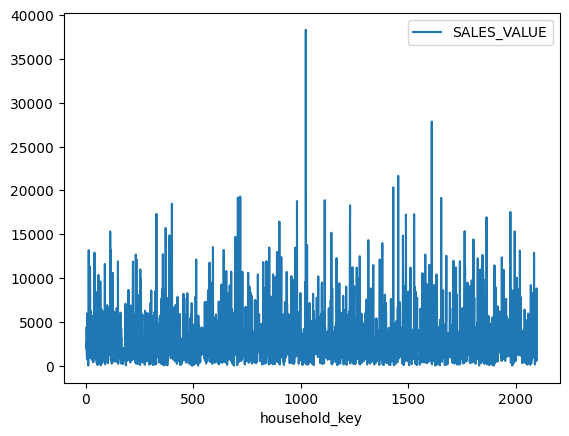

In [86]:
dfs.groupby(["household_key"]).agg({"SALES_VALUE":"sum"}).reset_index().plot(x="household_key",y="SALES_VALUE")

In [95]:
# Top 10 households by quantity purchased
grouped_household_by_quantity_purchased = dfs.groupby(["household_key"]).agg({"QUANTITY":"sum"}).sort_values("QUANTITY", ascending=False).iloc[:10]
grouped_household_by_quantity_purchased

,QUANTITY
household_key,
1023,4479917
755,3141769
1609,2146715
13,1863829
1430,1741892
1527,1734632
1762,1669880
707,1640193
1029,1496204


In [94]:
# Top 10 households by sales value
grouped_household_by_total_sales = dfs.groupby(["household_key"]).agg({"SALES_VALUE":"sum"}).sort_values("SALES_VALUE", ascending=False).iloc[:10]
grouped_household_by_total_sales

,SALES_VALUE
household_key,
1023,38319.789062
1609,27859.679688
1453,21661.289062
1430,20352.990234
718,19299.859375
707,19194.419922
1653,19153.750000
1111,18894.720703
982,18790.339844


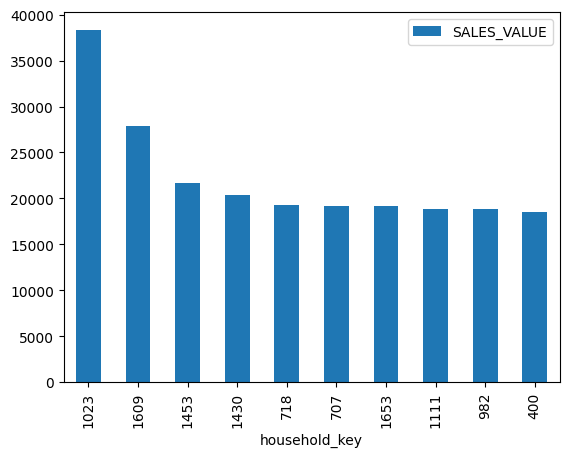

In [97]:
grouped_household_by_total_sales.plot.bar();

## Product Analysis

* Which products had the most sales by sales_value? Plot  a horizontal bar chart.
* Did the top 10 selling items have a higher than average discount rate?
* What was the most common `PRODUCT_ID` among rows with the households in our top 10 households by sales value?
* Look up the names of the  top 10 products by sales in the `products.csv` dataset.
* Look up the product name of the item that had the highest quantity sold in a single row.

In [99]:
dfs.head(2)

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,WEEK_NO,total_discount,discount_pct
0,1364,26984896261,1,842930,1,2.19,31742,1,0.0,0.000000
1,1364,26984896261,1,897044,1,2.99,31742,1,-0.4,0.133779


<Axes: ylabel='PRODUCT_ID'>

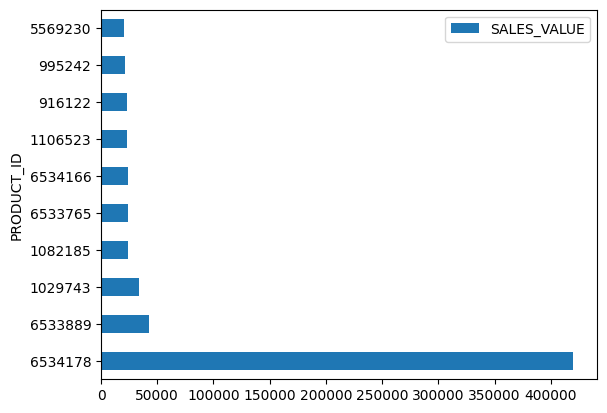

In [143]:
# Products had the most sales by sales_value
most_product_by_sales = dfs.groupby(["PRODUCT_ID"]).agg({"SALES_VALUE":"sum"}).sort_values("SALES_VALUE", ascending=False).iloc[:10]
most_product_by_sales
# Plot a horizontal bar chart
most_product_by_sales.plot.barh()

In [122]:
# Average discount rate
avg_dis_rate = dfs["discount_pct"].mean()
avg_dis_rate
# dose top 10 selling items have a higher than average discount rate
the_top_discount = dfs[dfs["PRODUCT_ID"].isin(most_product_by_sales.index)]["discount_pct"].mean()
# Comparing the two discounts
print("Average discount overall:", avg_dis_rate)
print("Average discount for top 10 products:", the_top_discount)

Average discount overall: 0.2081416
Average discount for top 10 products: 0.18546098


In [129]:
grouped_household_by_total_sales_rows = dfs[dfs["household_key"].isin(grouped_household_by_total_sales.index)]
most_common_product_among_top_household = grouped_household_by_total_sales_rows["PRODUCT_ID"].value_counts().idxmax()
most_common_product_among_top_household

np.uint32(1082185)

In [134]:
products = pd.read_csv("/content/drive/MyDrive/product.csv")
products.head(1)

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB


In [139]:
name_of_most_sale_products = products[products["PRODUCT_ID"].isin(most_product_by_sales.index)]
name_of_most_sale_products

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
16863,916122,4314,MEAT,National,CHICKEN,CHICKEN BREAST BONELESS,
25754,995242,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,
29657,1029743,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 GA
35576,1082185,2,PRODUCE,National,TROPICAL FRUIT,BANANAS,40 LB
38262,1106523,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 GA
53097,5569230,1208,GROCERY,National,SOFT DRINKS,SOFT DRINKS 12/18&15PK CAN CAR,12 OZ
57171,6533765,69,KIOSK-GAS,Private,FUEL,GASOLINE-REG UNLEADED,
57181,6533889,69,MISC SALES TRAN,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
57216,6534166,69,MISC SALES TRAN,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
57221,6534178,69,KIOSK-GAS,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,


In [141]:
# Products had the most sales by quantity
most_product_by_quantity = dfs.groupby(["PRODUCT_ID"]).agg({"QUANTITY":"sum"}).sort_values("QUANTITY", ascending=False).iloc[:10]
most_product_by_quantity

,QUANTITY
PRODUCT_ID,
6534178,180705254
6533889,16904944
6534166,9880540
6544236,2400961
397896,1181305
1404121,1135804
480014,428311
5668996,266088
6410462,211085


In [145]:
products[products["PRODUCT_ID"].isin(most_product_by_quantity.index)]

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
3565,397896,69,KIOSK-GAS,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
4058,480014,69,KIOSK-GAS,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
44796,1404121,69,KIOSK-GAS,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
54694,5668996,69,KIOSK-GAS,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
54801,5703832,69,KIOSK-GAS,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
56279,6410462,69,KIOSK-GAS,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
57181,6533889,69,MISC SALES TRAN,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
57216,6534166,69,MISC SALES TRAN,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
57221,6534178,69,KIOSK-GAS,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
57335,6544236,69,MISC SALES TRAN,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
